In [1]:
# Import the required library
import pandas as pd
from geopy.geocoders import Nominatim
import geopandas as gpd
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable

In [2]:
# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

In [3]:
location = geolocator.geocode("Andhra pradesh")
print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)

The latitude of the location is:  15.9240905
The longitude of the location is:  80.1863809


In [4]:
location = geolocator.geocode("Karnataka")
print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)

The latitude of the location is:  14.5203896
The longitude of the location is:  75.7223521


In [5]:
location = geolocator.geocode("Bhopal")
print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)

The latitude of the location is:  23.2584857
The longitude of the location is:  77.401989


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv(r"/content/drive/MyDrive/PreparedClinicalData.csv")

In [8]:
data.head()

,Unnamed: 0,ReportId,StateId,DistrictId,DistrictName,TalukaId,MncHospitalId,MncVisiteDate,ReportingMonthyear,ReportingDate,...,CreatedDate,IsMnc,Manochaitanya,total_male,total_female,total_new,total_old,total_op,total_ip,TotalVisitedPatients
0,0,21,17,3,Bangalore Urban,298.0,NaN,NaN,2017-04-01,2017-08-09,...,2017-08-09,0,N,75.0,64.0,13.0,126.0,139.0,0.0,139.0
1,1,22,17,45,Bbmp,297.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,3.0,3.0,4.0,2.0,6.0,0.0,6.0
2,2,23,17,45,Bbmp,296.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,24,17,45,Bbmp,295.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,3.0,0.0,1.0,2.0,3.0,0.0,3.0
4,4,25,17,45,Bbmp,294.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
districts = data[['DistrictId', 'DistrictName']].drop_duplicates()
districts.reset_index(drop=True, inplace=True)
districts

,DistrictId,DistrictName
0,3,Bangalore Urban
1,45,Bbmp
2,44,Yadgir
3,43,Uttara Kannada
4,37,Raichur
5,35,Mysore
6,33,Koppal
7,30,Haveri
8,27,Gadag
9,20,Chitradurga


In [10]:
ids = districts["DistrictId"]
ids

0      3
1     45
2     44
3     43
4     37
5     35
6     33
7     30
8     27
9     20
10    19
11    18
12    16
13    15
14    13
15    12
16     1
17    25
18    42
19    41
20    39
21    38
22    34
23    32
24    31
25    28
26    21
27    17
28     2
29    29
30    23
Name: DistrictId, dtype: int64

In [11]:
names = districts["DistrictName"]
names

0      Bangalore Urban
1                 Bbmp
2               Yadgir
3       Uttara Kannada
4              Raichur
5               Mysore
6               Koppal
7               Haveri
8                Gadag
9          Chitradurga
10         Chikmagalur
11      Chikkaballapur
12             Bijapur
13               Bidar
14             Bellary
15             Belgaum
16           Bagalkote
17             Dharwad
18               Udupi
19              Tumkur
20             Shimoga
21           Ramanagar
22              Mandya
23               Kolar
24              Kodagu
25            Gulbarga
26    Dakshina Kannada
27        Chamrajnagar
28     Bangalore Rural
29              Hassan
30          Davanagere
Name: DistrictName, dtype: object

In [12]:
coords = pd.DataFrame(columns=['ID', 'Place','Latitude','Longitude'])

In [13]:
for i in range(len(names)):
    try:
        location = geolocator.geocode(names[i])
        coords.loc[len(coords)]={'ID':ids[i], 'Place': names[i],'Latitude':location.latitude, 'Longitude':location.longitude}
    except:
        continue

In [14]:
coords

,ID,Place,Latitude,Longitude
0,3,Bangalore Urban,13.000000,77.583333
1,45,Bbmp,13.058135,77.506462
2,44,Yadgir,16.767096,77.140398
3,43,Uttara Kannada,14.883333,74.583333
4,37,Raichur,16.083333,77.166667
5,35,Mysore,12.305183,76.655361
6,33,Koppal,15.348414,76.154742
7,30,Haveri,14.787482,75.399673
8,27,Gadag,15.421087,75.654559
9,20,Chitradurga,14.226644,76.400512


In [15]:
VisitPredictions = {'1': 130.95658641465997, '2': 144.928571, '3': 249.487805, '12': 108.02373081019874, '13': 361.940741, '15': 116.26188046882066, '16': 44.02697495298788, '17': 161.902439, '18': 555.560976, '19': 598.177095,
                    '20': 77.90615999201721, '21': 278.815063, '23': 550.4540110181078, '25': 50.646623596081376, '27': 91.46934607107055, '28': 271.0057244023, '29': 239.107143, '30': 281.650809, '31': 242.14364, '32': 116.785185,
                    '33': 28.616630723877368, '34': 231.609756, '35': 255.77917458907893, '37': 263.6555665393537, '38': 79.52402938542872, '39': 516.527778, '41': 109.28572385427759, '42': 24.544101943043543,
                    '43': 661.8508997079608, '44': 30.333333, '45': 737.137931}

In [16]:
coords['VisitPredictions'] = coords['ID'].astype(str).map(VisitPredictions)

In [17]:
coords

,ID,Place,Latitude,Longitude,VisitPredictions
0,3,Bangalore Urban,13.000000,77.583333,249.487805
1,45,Bbmp,13.058135,77.506462,737.137931
2,44,Yadgir,16.767096,77.140398,30.333333
3,43,Uttara Kannada,14.883333,74.583333,661.850900
4,37,Raichur,16.083333,77.166667,263.655567
5,35,Mysore,12.305183,76.655361,255.779175
6,33,Koppal,15.348414,76.154742,28.616631
7,30,Haveri,14.787482,75.399673,281.650809
8,27,Gadag,15.421087,75.654559,91.469346
9,20,Chitradurga,14.226644,76.400512,77.906160


In [18]:
data = coords.copy()

In [43]:
nonames = data[["Latitude", "Longitude", "VisitPredictions"]]
nonames

,Latitude,Longitude,VisitPredictions
0,13.000000,77.583333,249.487805
1,13.058135,77.506462,737.137931
2,16.767096,77.140398,30.333333
3,14.883333,74.583333,661.850900
4,16.083333,77.166667,263.655567
5,12.305183,76.655361,255.779175
6,15.348414,76.154742,28.616631
7,14.787482,75.399673,281.650809
8,15.421087,75.654559,91.469346
9,14.226644,76.400512,77.906160


In [38]:
data

,ID,Place,Latitude,Longitude,VisitPredictions
0,3,Bangalore Urban,13.000000,77.583333,249.487805
1,45,Bbmp,13.058135,77.506462,737.137931
2,44,Yadgir,16.767096,77.140398,30.333333
3,43,Uttara Kannada,14.883333,74.583333,661.850900
4,37,Raichur,16.083333,77.166667,263.655567
5,35,Mysore,12.305183,76.655361,255.779175
6,33,Koppal,15.348414,76.154742,28.616631
7,30,Haveri,14.787482,75.399673,281.650809
8,27,Gadag,15.421087,75.654559,91.469346
9,20,Chitradurga,14.226644,76.400512,77.906160


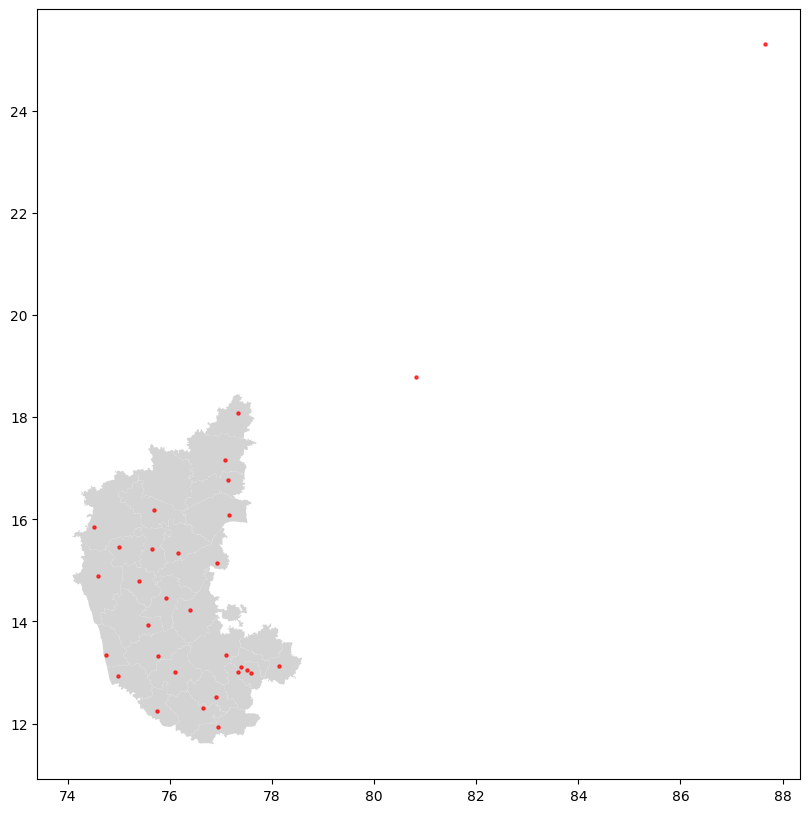

In [51]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your shapefile
shapefile_path = '/content/sample_data/Karnataka shapefile.shp'  # Replace with the path to your shapefile
map_df = gpd.read_file(shapefile_path)

# Your latitude, longitude, and visit prediction data

# Create a GeoDataFrame from your data
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
map_df.plot(ax=ax, color='lightgrey')  # Plot the shapefile as the background
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.7)  # Plot your data on top
plt.show()


In [54]:
# Update the coordinates for Ramanagara (ID=38) and Bijapur (ID=16)
ramanagara_index = data[data['ID'] == 38].index
data.loc[ramanagara_index, ['Latitude', 'Longitude']] = [12.6003, 77.4702]

bijapur_index = data[data['ID'] == 16].index
data.loc[bijapur_index, ['Latitude', 'Longitude']] = [16.8302, 75.7100]

In [59]:
data

,ID,Place,Latitude,Longitude,VisitPredictions
0,3,Bangalore Urban,13.000000,77.583333,249.487805
1,45,Bbmp,13.058135,77.506462,737.137931
2,44,Yadgir,16.767096,77.140398,30.333333
3,43,Uttara Kannada,14.883333,74.583333,661.850900
4,37,Raichur,16.083333,77.166667,263.655567
5,35,Mysore,12.305183,76.655361,255.779175
6,33,Koppal,15.348414,76.154742,28.616631
7,30,Haveri,14.787482,75.399673,281.650809
8,27,Gadag,15.421087,75.654559,91.469346
9,20,Chitradurga,14.226644,76.400512,77.906160


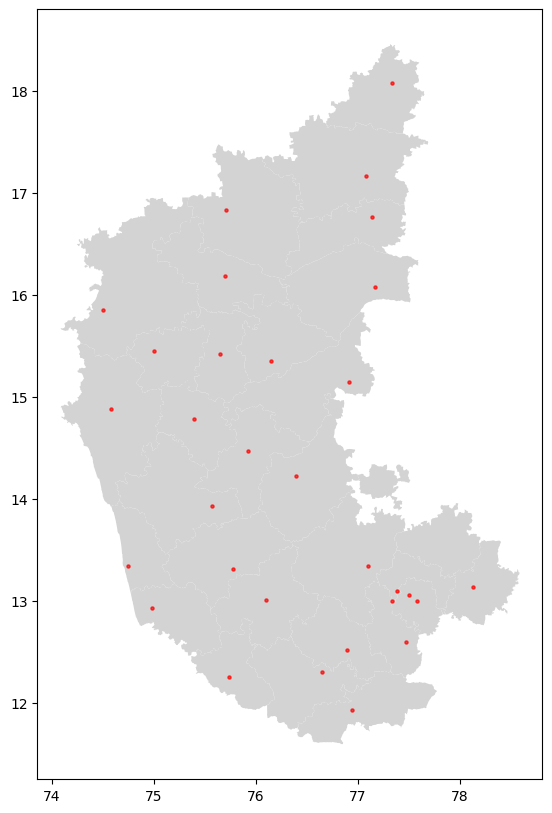

In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your shapefile
shapefile_path = '/content/sample_data/Karnataka shapefile.shp'  # Replace with the path to your shapefile
map_df = gpd.read_file(shapefile_path)

# Your latitude, longitude, and visit prediction data

# Create a GeoDataFrame from your data
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
map_df.plot(ax=ax, color='lightgrey')  # Plot the shapefile as the background
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.7)  # Plot your data on top
plt.show()

In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import pandas as pd
import numpy as np

# Load Karnataka State Shapefile
karnataka = gpd.read_file('/content/sample_data/Karnataka shapefile.shp')
print(karnataka.columns)

Index(['Dist_Name', 'State_Name', 'geometry'], dtype='object')


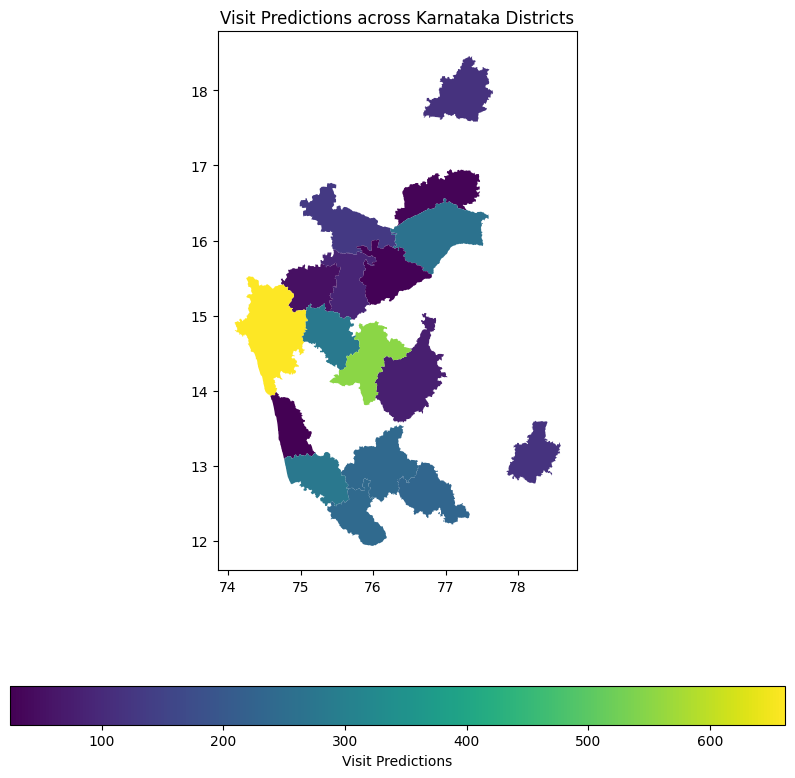

In [68]:

# Merge your visit prediction data with the map data
# Replace 'visit_predictions' with the column name from your data
merged_data = karnataka_map.merge(data, how='left', left_on='Dist_Name', right_on='Place')

# Visualize the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='VisitPredictions', ax=ax, legend=True,
                 legend_kwds={'label': "Visit Predictions", 'orientation': "horizontal"})
plt.title('Visit Predictions across Karnataka Districts')
plt.show()


In [19]:
pip install pykrige

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 854.9/854.9 kB 6.6 MB/s eta 0:00:00


In [20]:
from pykrige.rk import Krige
from sklearn.model_selection import GridSearchCV
import warnings
param_dict = {
    "method": ["ordinary"],
    "variogram_model": ["linear", "power", "gaussian", "spherical"],
    "nlags": [4, 6, 8, 12],
    "weight": [True, False]
}

estimator = GridSearchCV(Krige(), param_dict, verbose=0, return_train_score=True)
warnings.filterwarnings("ignore", message="n_closest_points will be ignored for UniversalKriging")
estimator.fit(X=data[['Longitude', 'Latitude']].values, y=data['VisitPredictions'].values)

if hasattr(estimator, 'best_score_'):
    print('best_score R² = {:.3f}'.format(estimator.best_score_))
    print('best_params = ', estimator.best_params_)
best_parameters=estimator.best_params_

best_score R² = -0.725
best_params =  {'method': 'ordinary', 'nlags': 8, 'variogram_model': 'spherical', 'weight': True}


In [22]:
import geopandas as gpd
from pykrige.ok import OrdinaryKriging
import numpy as np

boundary = gpd.read_file("/content/sample_data/Karnataka shapefile.shp")
min_lon, min_lat, max_lon, max_lat = boundary.total_bounds
grid_lon = np.linspace(min_lon, max_lon, 300)
grid_lat = np.linspace(min_lat, max_lat, 300)

model = OrdinaryKriging(
    data['Longitude'], data['Latitude'],data['VisitPredictions'],
    variogram_model=best_parameters['variogram_model'],
    nlags=best_parameters['nlags'],
    weight=best_parameters['weight'],
    verbose=False)

z, ss = model.execute('grid', grid_lon, grid_lat)

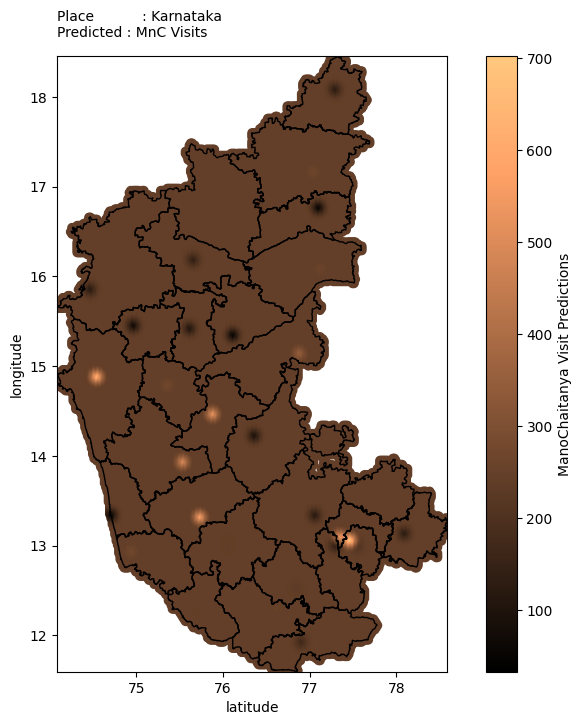

In [23]:
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon, Polygon
from matplotlib.path import Path
from matplotlib.patches import PathPatch

boundary_poly = boundary.geometry.unary_union

clipped_values = []
clipped_lon = []
clipped_lat = []

for i in range(len(grid_lon) - 1):
    for j in range(len(grid_lat) - 1):
        poly = Polygon([
            (grid_lon[i], grid_lat[j]),
            (grid_lon[i + 1], grid_lat[j]),
            (grid_lon[i + 1], grid_lat[j + 1]),
            (grid_lon[i], grid_lat[j + 1])
        ])
        if poly.intersects(boundary_poly):
            clipped_values.append(z[j, i])
            clipped_lon.append((grid_lon[i] + grid_lon[i + 1]) / 2)
            clipped_lat.append((grid_lat[j] + grid_lat[j + 1]) / 2)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)
im = ax.scatter(clipped_lon, clipped_lat, c=clipped_values, cmap='copper')
boundary.plot(ax=ax, edgecolor='black', facecolor='none')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("ManoChaitanya Visit Predictions")
title_text = 'Place           : Karnataka \nPredicted : MnC Visits'
plt.text(0, 1.05, title_text, ha='left', va='center', transform=plt.gca().transAxes, fontsize=10, color='black')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


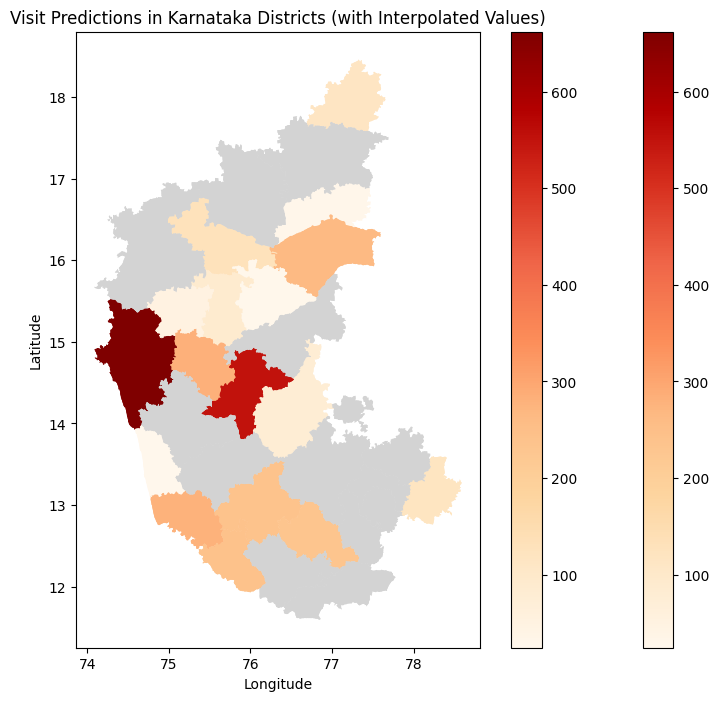

In [57]:

# Merge Data with Shapefile
merged_data = karnataka.merge(data, how='left', left_on='Dist_Name', right_on='Place')

# Plotting Visit Predictions on the Karnataka Map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_data.plot(column='VisitPredictions', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey'})
plt.title('Visit Predictions in Karnataka Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Interpolate Missing Values (Example using linear interpolation)
missing_data = merged_data[merged_data['VisitPredictions'].isnull()]  # Get missing data rows

# Perform interpolation for missing values (Example using linear interpolation)
if not missing_data.empty:
    points = merged_data[['Latitude', 'Longitude']].dropna()  # Use available lat/long values for interpolation
    values = merged_data['VisitPredictions'].dropna()

    # Interpolation function
    interpolate_predictions = griddata(
        points,
        values,
        (missing_data['Latitude'], missing_data['Longitude']),
        method='linear'
    )

    # Fill missing values in the dataframe
    missing_data['VisitPredictions'] = interpolate_predictions
    merged_data.update(missing_data)

# Plot the updated map with interpolated values
merged_data.plot(column='VisitPredictions', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey'})
plt.title('Visit Predictions in Karnataka Districts (with Interpolated Values)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [62]:
df = data.copy()

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Provided data (your dataframe)
# ... (Use the data provided in your dataframe)

# Creating a map centered around Karnataka
karnataka_map = folium.Map(location=[14.5204, 75.7224], zoom_start=7)

# Generating HeatMap
heat_data = [[row['Latitude'], row['Longitude'], row['VisitPredictions']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(karnataka_map)

karnataka_map
# Save the map as an HTML file
karnataka_map.save("karnataka_heatmap_without_interpolation.html")

In [65]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Create a map centered around Karnataka
map_karnataka = folium.Map(location=[12.9, 76.5], zoom_start=7, tiles='Stamen Terrain')

# Define the grid for interpolation
x = np.array(df['Latitude'])
y = np.array(df['Longitude'])
z = np.array(df['VisitPredictions'])

# Generate a grid to interpolate
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate missing values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Handle NaN values by replacing them with zeros
zi = np.nan_to_num(zi, nan=0.0)

# Flatten the interpolated grid data
interpolated_data = []
for i in range(len(xi)):
    for j in range(len(yi)):
        interpolated_data.append([xi[i][j], yi[i][j], zi[i][j]])

# Adding HeatMap to the map
HeatMap(interpolated_data).add_to(map_karnataka)

# Save the map as an HTML file
map_karnataka.save('karnataka_heatmap_interpolated.html')
# Display the map
karnataka_map

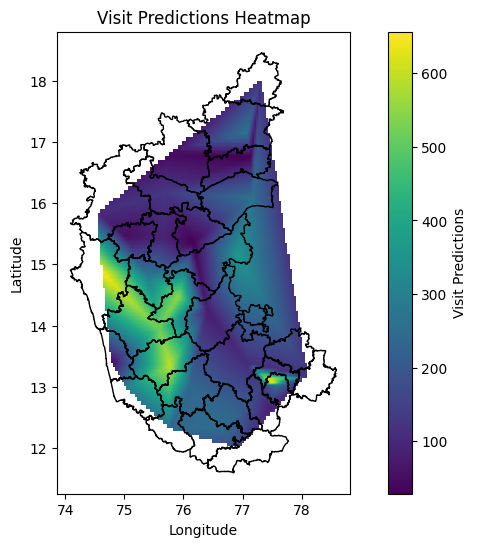

In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# Load the shapefile
shapefile_path = '/content/sample_data/Karnataka shapefile.shp'
map_df = gpd.read_file(shapefile_path)

# Interpolate missing data
x = np.array(data['Longitude'])
y = np.array(data['Latitude'])
z = np.array(data['VisitPredictions'])

# Create a grid to interpolate the data onto
x_grid, y_grid = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))

z_interp = griddata((x, y), z, (x_grid, y_grid), method='linear')

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(z_interp, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='viridis')
plt.colorbar(label='Visit Predictions')
map_df.plot(ax=plt.gca(), color='none', edgecolor='black')  # Plot the shapefile boundaries
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Visit Predictions Heatmap')
plt.show()
